In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import datasets


In [2]:
#Reading data from csv file into a data frame
df_blobs=pd.read_csv('/content/cluster_blobs.csv')
df_circles=pd.read_csv('/content/cluster_circles.csv')
df_moons=pd.read_csv('/content/cluster_moons.csv')

In [3]:
print("No of NAN values in given blobs_set_1")
print("No of NAN values in given circles_set_2")
print("No of NAN values in given moons_set_3")
print(df_blobs.isna().sum().sum())
print(df_circles.isna().sum().sum())
print(df_moons.isna().sum().sum())

No of NAN values in given blobs_set_1
No of NAN values in given circles_set_2
No of NAN values in given moons_set_3
0
0
0


In [4]:
#Checking if any NAN values present in given data 
print("No of NULL values in given data-blobs")
print("No of NULL values in given data_circles")
print("No of NULL values in given data_moons")
print(df_blobs.isnull().sum().sum())
print(df_circles.isnull().sum().sum())
print(df_moons.isnull().sum().sum())

No of NULL values in given data-blobs
No of NULL values in given data_circles
No of NULL values in given data_moons
0
0
0


In [5]:
duplicate = df_blobs[df_blobs.duplicated()]
print("Printing duplicated rows in blobs data")
duplicate

Printing duplicated rows in blobs data


,X1,X2


In [6]:
duplicate = df_circles[df_circles.duplicated()]
print("Printing duplicated rows in circles data")
duplicate

Printing duplicated rows in circles data


,X1,X2


In [7]:
duplicate = df_moons[df_moons.duplicated()]
print("Printing duplicated rows in moons data")
duplicate

Printing duplicated rows in moons data


,X_1,X_2


Silhouette Coefficient:0.82


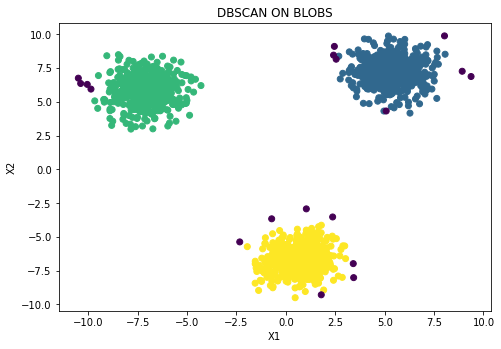

In [9]:
db_blobs = DBSCAN(eps=0.8, min_samples=10).fit(df_blobs)
outliers = pd.DataFrame(df_blobs)
#print(outliers[db_blobs.labels_ == -1])
from pyparsing.helpers import col
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])
colors = db_blobs.labels_

ax.scatter(df_blobs.iloc[:,0].values,df_blobs.iloc[:,1].values,c=colors)

ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.title('DBSCAN ON BLOBS')

sc = metrics.silhouette_score(df_blobs, colors)
print("Silhouette Coefficient:%0.2f"%sc)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


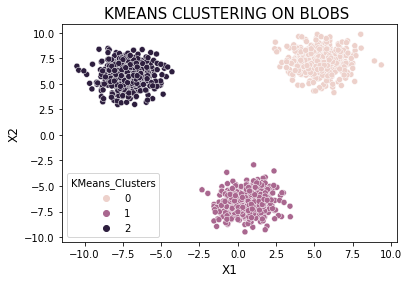

Printing shilhoutte scre using KMeans


0.8638532520315105

In [11]:
#KMEANS
#Using kmeans model with k value 3
kmeans_on_blobs_data= KMeans(n_clusters = 3,random_state = 111)
kmeans_on_blobs_data.fit(df_blobs)
preds = kmeans_on_blobs_data.labels_
df_with_clusters=pd.DataFrame(df_blobs)
df_with_clusters['KMeans_Clusters']=preds
sns.scatterplot(df_with_clusters['X1'],df_with_clusters['X2'],hue='KMeans_Clusters',data=df_with_clusters) 
plt.title("KMEANS CLUSTERING ON BLOBS ", fontsize=15)
plt.xlabel("X1", fontsize=12)
plt.ylabel("X2", fontsize=12)
plt.show()
#calculating Silhouette Coefficient of model for k=3
print("Printing shilhoutte scre using KMeans")
metrics.silhouette_score(df_blobs, kmeans_on_blobs_data.labels_)

Silhouette Coefficient:0.16


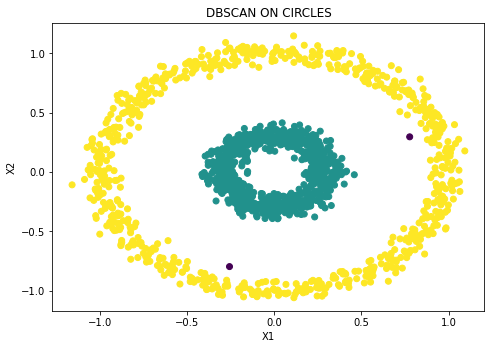

In [12]:
db_circles = DBSCAN(eps=0.103, min_samples=9).fit(df_circles)
outliers = pd.DataFrame(df_circles)
#print(outliers[db_circles.labels_ == -1])
from pyparsing.helpers import col
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])
colors = db_circles.labels_

ax.scatter(df_circles.iloc[:,0].values,df_circles.iloc[:,1].values,c=colors)

ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.title('DBSCAN ON CIRCLES')

sc = metrics.silhouette_score(df_circles, colors)
print("Silhouette Coefficient:%0.2f"%sc)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


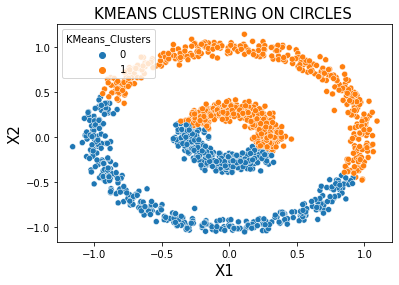

Printing shilhoutte scre using KMeans


0.5068292236193002

In [13]:
#KMEANS
kmeans_on_circles_data= KMeans(n_clusters = 2,random_state = 111)
kmeans_on_circles_data.fit(df_circles)
#print the number of points in every cluster
preds = kmeans_on_circles_data.labels_
df_clusters=pd.DataFrame(df_circles)
df_clusters['KMeans_Clusters']=preds
sns.scatterplot(df_clusters['X1'],df_clusters['X2'],hue='KMeans_Clusters',data=df_clusters) 
plt.title("KMEANS CLUSTERING ON CIRCLES ", fontsize=15)
plt.xlabel("X1", fontsize=15)
plt.ylabel("X2", fontsize=15)
plt.show()
#calculating Silhouette Coefficient of model for k=3
print("Printing shilhoutte scre using KMeans")
metrics.silhouette_score(df_circles, kmeans_on_circles_data.labels_)

Silhouette Coefficient:0.19


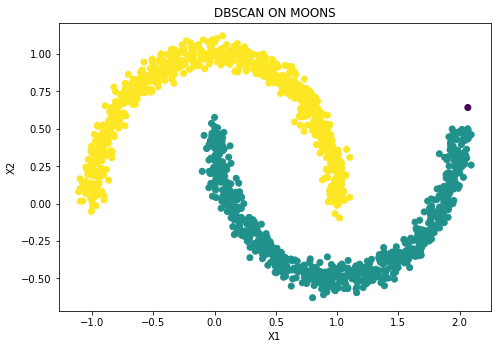

In [14]:
db_moons = DBSCAN(eps=0.123, min_samples=10).fit(df_moons)
outliers = pd.DataFrame(df_moons)
#print(outliers[db_circles.labels_ == -1])
from pyparsing.helpers import col
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])
colors = db_moons.labels_

ax.scatter(df_moons.iloc[:,0].values,df_moons.iloc[:,1].values,c=colors)

ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.title('DBSCAN ON MOONS')

sc = metrics.silhouette_score(df_moons, colors)
print("Silhouette Coefficient:%0.2f"%sc)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


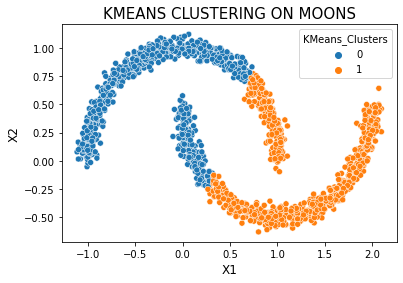

Printing shilhoutte scre using KMeans


0.5856866231023987

In [15]:
#KMEANS
kmeans_on_moons_data= KMeans(n_clusters = 2,random_state = 111)
kmeans_on_moons_data.fit(df_moons)
preds = kmeans_on_moons_data.labels_
df_moons_clusters=pd.DataFrame(df_moons)
df_moons_clusters['KMeans_Clusters']=preds
df_moons_clusters
sns.scatterplot(df_moons_clusters['X_1'],df_moons_clusters['X_2'],hue='KMeans_Clusters',data=df_moons_clusters) 
plt.title("KMEANS CLUSTERING ON MOONS", fontsize=15)
plt.xlabel("X1", fontsize=12)
plt.ylabel("X2", fontsize=12)
plt.show()
#calculating Silhouette Coefficient of model for k=3
print("Printing shilhoutte scre using KMeans")
metrics.silhouette_score(df_moons, kmeans_on_moons_data.labels_)